In [1]:
import numpy as np  
import pandas as pd 
import plotly.express as px

import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  

print('Matplotlib version: ', mpl.__version__) 


Matplotlib version:  3.9.2


In [2]:
restaurant_data = pd.read_csv('restaurant_data.csv', dtype={})
print('read file')


read file


In [47]:
app = dash.Dash(__name__)

print(restaurant_data.columns)

sorted_restaurant_data = restaurant_data.sort_values(by='Revenue',ascending=False)

sorted_restaurant_data = sorted_restaurant_data.head(7)

x_data = sorted_restaurant_data['Name'].tolist()

y_data =sorted_restaurant_data['Revenue'].tolist()

print(x_data)
print(y_data)

bar_colors = ['mediumseagreen','fuchsia','olive','peachpuff','turquoise','orchid','darkviolet']

 # Define the layout of the app
app.layout = html.Div(children=[
    html.H1('Revenue of 7 Highest Earning Restaurants'), 
    
                                     
    dcc.Graph(
        id='bar-plot',
        figure={
            'data': [
                go.Bar(
                    x=x_data,
                    y=y_data,
                    marker=dict(color=bar_colors)  # You can customize the color here
                )
            ],
            'layout': go.Layout(
                title='Revenue of 7 Highest Earning Restaurants',
                xaxis=dict(title='Food-Categories'),
                yaxis=dict(title='Revenue')
            )
        }
    )
])


if __name__ == '__main__':
    app.run_server()

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')
['Restaurant 4324', 'Restaurant 7093', 'Restaurant 3952', 'Restaurant 5431', 'Restaurant 2196', 'Restaurant 3039', 'Restaurant 2804']
[1531867.55, 1518965.19, 1515593.1, 1515520.96, 1509391.07, 1502563.13, 1501515.11]


Restaurant #4324 makes the most revenue, $1.5 million!

In [51]:
sorted_restaurant_data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
4324,Restaurant 4324,Downtown,Japanese,4.1,90,75.83,3115,34238,17,535,215.186349,5.5,5.7,No,33,62,1531867.55
7093,Restaurant 7093,Downtown,Japanese,3.6,90,75.41,4666,45465,15,776,239.065091,1.2,8.8,Yes,7,17,1518965.19
3952,Restaurant 3952,Downtown,Japanese,4.1,90,74.80,6627,72844,17,693,87.249043,7.8,4.4,No,21,22,1515593.10
5431,Restaurant 5431,Downtown,Japanese,4.5,89,75.51,6812,68002,18,907,195.191806,4.6,1.7,Yes,10,85,1515520.96
2196,Restaurant 2196,Downtown,Japanese,3.6,90,75.51,2057,25811,3,308,115.570703,9.5,2.8,No,22,70,1509391.07


In [53]:
import seaborn as sns

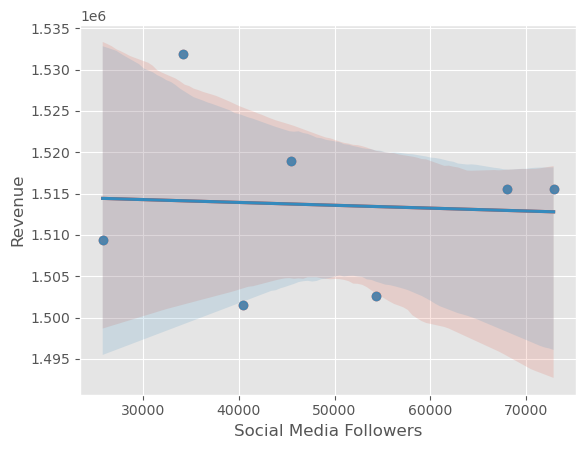

In [57]:
sns.regplot(x='Social Media Followers', y='Revenue', data=sorted_restaurant_data)
plt.show()

The number of social media followers doesn't have a set correlation on the overall revenue.

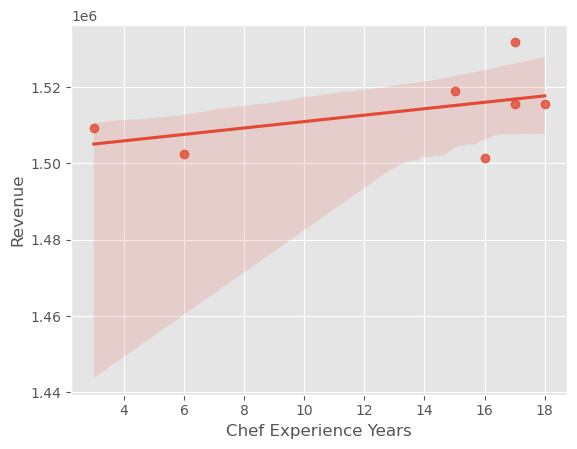

In [60]:
sns.regplot(x='Chef Experience Years', y='Revenue', data=sorted_restaurant_data)
plt.show()

As the chef is more experienced, the revenue gradually increases.

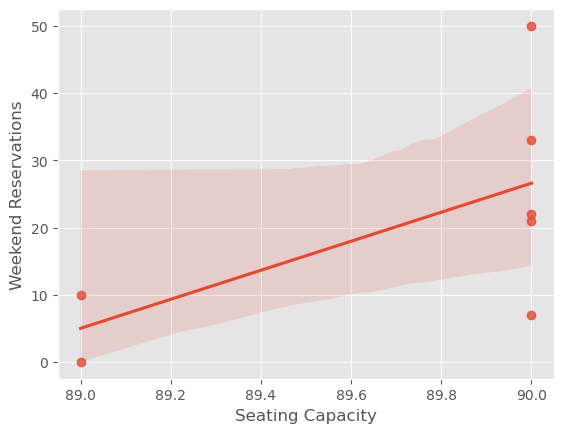

In [63]:
sns.regplot(x='Seating Capacity', y='Weekend Reservations', data=sorted_restaurant_data)
plt.show()

The higher the seating capacity, the more weekend reservations there are.

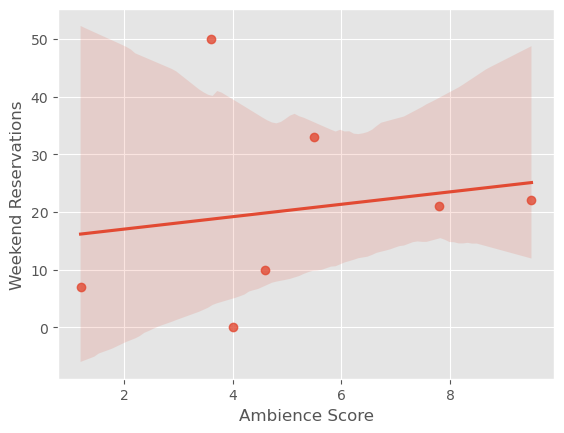

In [68]:
sns.regplot(x='Ambience Score', y='Weekend Reservations', data=sorted_restaurant_data)
plt.show()

Higher Ambience Score is positively correlated with the number of Weekend Reservations.

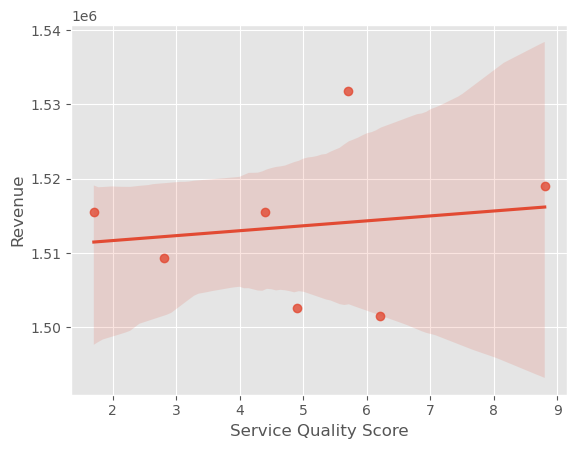

In [71]:
sns.regplot(x='Service Quality Score', y='Revenue', data=sorted_restaurant_data)
plt.show()

Better service is positively correlated with more revenue.

7 Japanese restaurants in the downtown area earn the most revenue.  Social media doesn't have an impact on the total profit.  However, the more experienced the chef is, the more profitable the restaurant is. Ambience Score and Service Quality have a positive impact on the number of weekend reservations.

Here is the data from the #1 highest-earning restaurant.


In [75]:
sorted_restaurant_data.head(1)

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
4324,Restaurant 4324,Downtown,Japanese,4.1,90,75.83,3115,34238,17,535,215.186349,5.5,5.7,No,33,62,1531867.55


It doesn't offer parking availability and the marketing budget is not the highest.  However, the chef has 17 years of experience. The ambience score 
and service quality score are pretty good. The weekend reservations are the highest among the top seven.

In [81]:
weeknd_reservations = restaurant_data['Weekend Reservations']

In [83]:
weeknd_reservations.describe()

count    8368.000000
mean       29.491754
std        20.025415
min         0.000000
25%        13.000000
50%        27.000000
75%        43.000000
max        88.000000
Name: Weekend Reservations, dtype: float64

The highest weekend reservations are 88.

In [86]:
best_wkndr = restaurant_data[restaurant_data['Weekend Reservations'] == 88]

In [88]:
print(best_wkndr)

                 Name  Location  Cuisine  Rating  Seating Capacity  \
3193  Restaurant 3193  Downtown  Mexican     4.6                90   

      Average Meal Price  Marketing Budget  Social Media Followers  \
3193               28.09              6217                   64384   

      Chef Experience Years  Number of Reviews  Avg Review Length  \
3193                      8                766         290.950935   

      Ambience Score  Service Quality Score Parking Availability  \
3193             3.2                    9.4                   No   

      Weekend Reservations  Weekday Reservations    Revenue  
3193                    88                     1  584530.61  


The restaurant that has the most weekend reservations is a Mexican restaurant in Downtown. However, it still doesn't make the most money.  It's average
meal price is only $28.09, whereas at our top earning Japanese restaurant, an average meal costs $75.83.  So even if Restaurant 3193 is more popular 
on the weekend, it's also cheaper.